In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [49]:
#Loading data into dataframe

data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [3]:
#Shape of dataframe

data.shape

(11054, 32)

In [4]:
#Listing the features of the dataset

data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [5]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [6]:
# nunique value in columns

data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [7]:
#droping index column

data = data.drop(['Index'],axis = 1)

In [8]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


## 3. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

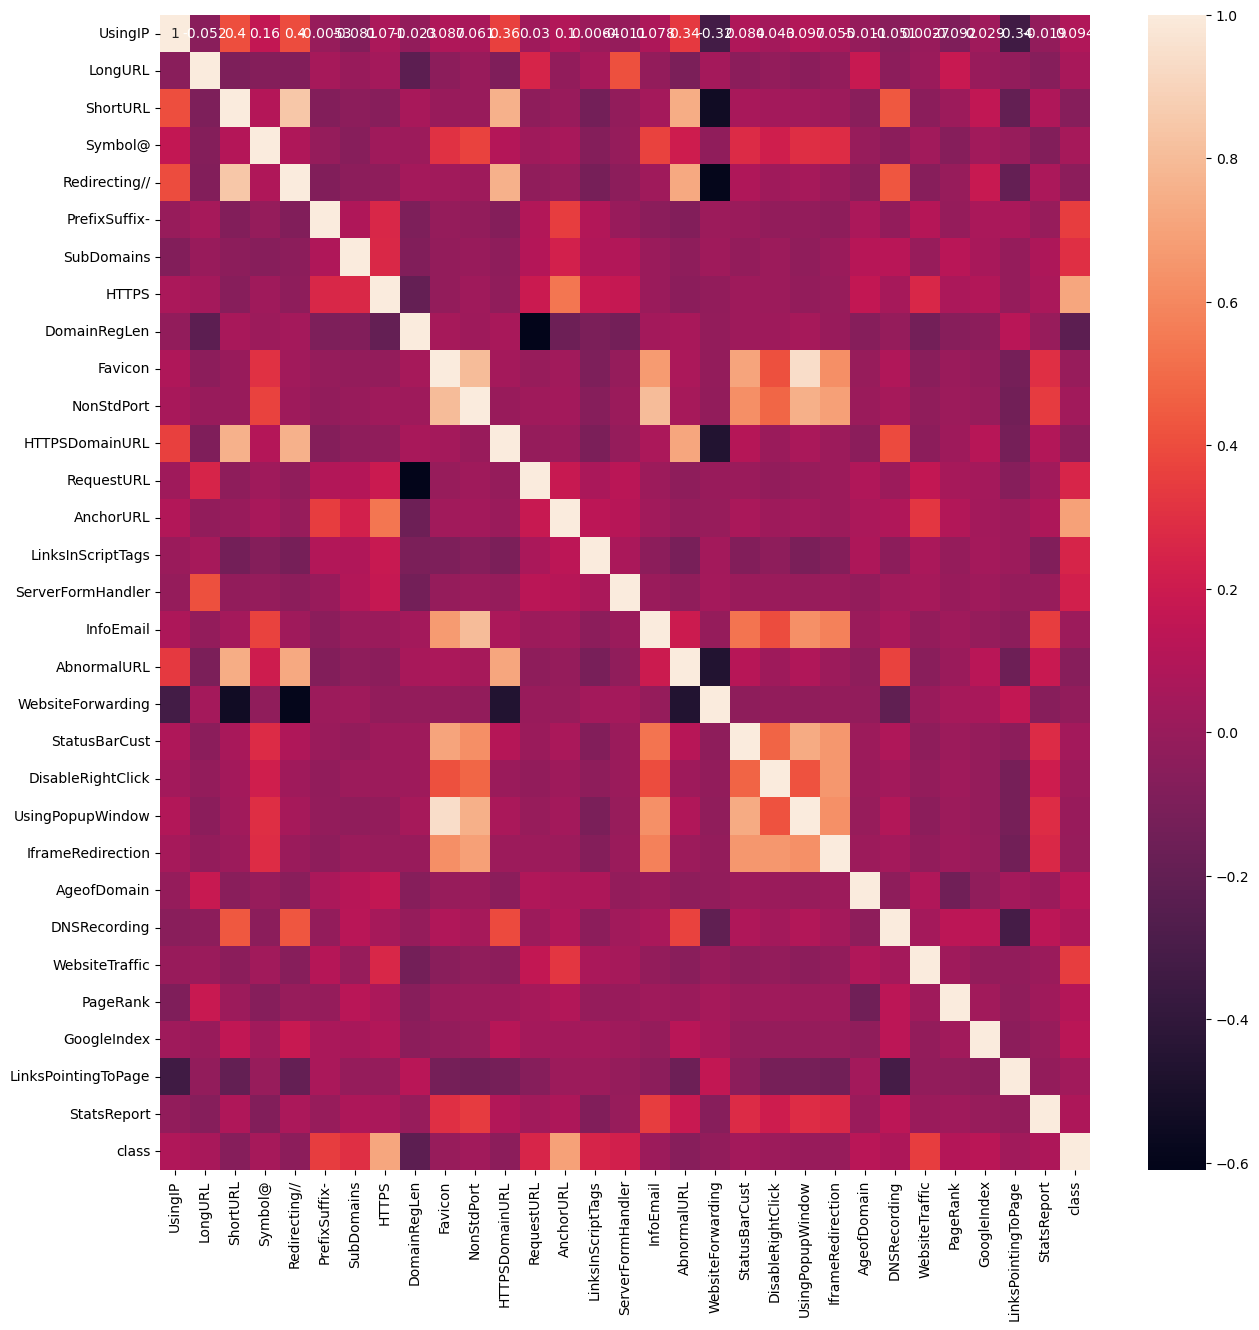

In [9]:
#Correlation heatmap

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [12]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["class"],axis =1)
y = data["class"]

In [13]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

In [14]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

In [15]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [17]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.989
K-Nearest Neighbors : Accuracy on test Data: 0.956

K-Nearest Neighbors : f1_score on training Data: 0.990
K-Nearest Neighbors : f1_score on test Data: 0.961

K-Nearest Neighborsn : Recall on training Data: 0.991
Logistic Regression : Recall on test Data: 0.962

K-Nearest Neighbors : precision on training Data: 0.989
K-Nearest Neighbors : precision on test Data: 0.960


In [18]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



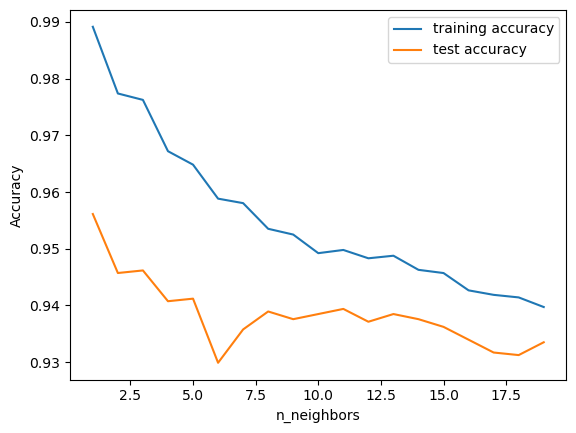

In [19]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [20]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

In [21]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [22]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [23]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.989
Gradient Boosting Classifier : Accuracy on test Data: 0.974

Gradient Boosting Classifier : f1_score on training Data: 0.990
Gradient Boosting Classifier : f1_score on test Data: 0.977

Gradient Boosting Classifier : Recall on training Data: 0.994
Gradient Boosting Classifier : Recall on test Data: 0.989

Gradient Boosting Classifier : precision on training Data: 0.986
Gradient Boosting Classifier : precision on test Data: 0.966


In [24]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.99      0.96      0.97       976
           1       0.97      0.99      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



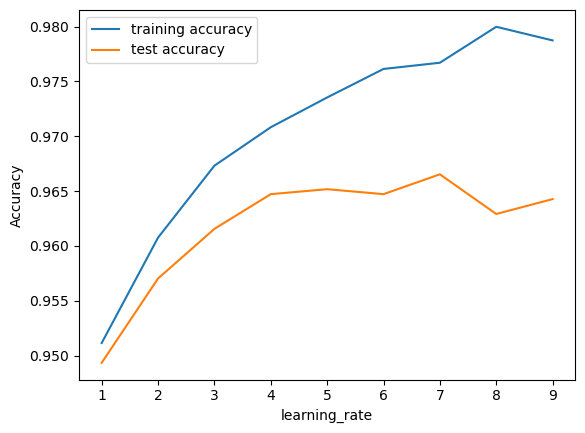

In [25]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

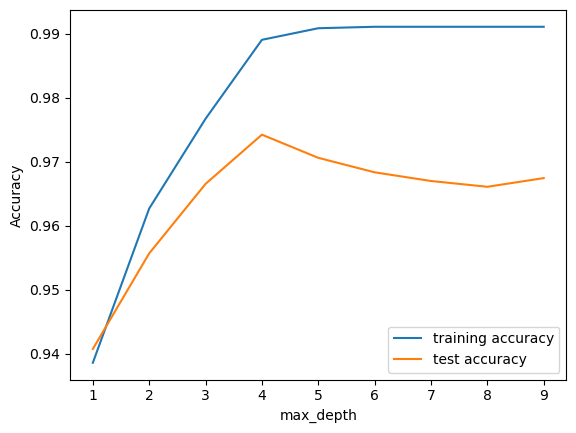

In [26]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [27]:
storeResults('GradientBoosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

In [29]:
# Gradient Boosting Classifier Model
from catboost import CatBoostClassifier


# instantiate the model
cat = CatBoostClassifier(learning_rate = n*0.1)

# fit the model 
cat.fit(X_train,y_train)

0:	learn: 0.2598694	total: 171ms	remaining: 2m 50s
1:	learn: 0.1750361	total: 200ms	remaining: 1m 39s
2:	learn: 0.1496628	total: 215ms	remaining: 1m 11s
3:	learn: 0.1271860	total: 232ms	remaining: 57.7s
4:	learn: 0.1193936	total: 247ms	remaining: 49.1s
5:	learn: 0.1111048	total: 264ms	remaining: 43.7s
6:	learn: 0.1042729	total: 280ms	remaining: 39.7s
7:	learn: 0.0985266	total: 296ms	remaining: 36.7s
8:	learn: 0.0937515	total: 319ms	remaining: 35.1s
9:	learn: 0.0891100	total: 334ms	remaining: 33.1s
10:	learn: 0.0853868	total: 415ms	remaining: 37.3s
11:	learn: 0.0791507	total: 433ms	remaining: 35.7s
12:	learn: 0.0742012	total: 452ms	remaining: 34.4s
13:	learn: 0.0680379	total: 468ms	remaining: 32.9s
14:	learn: 0.0636840	total: 483ms	remaining: 31.7s
15:	learn: 0.0615983	total: 498ms	remaining: 30.6s
16:	learn: 0.0587932	total: 514ms	remaining: 29.7s
17:	learn: 0.0569762	total: 528ms	remaining: 28.8s
18:	learn: 0.0559944	total: 543ms	remaining: 28s
19:	learn: 0.0541531	total: 558ms	remain

In [30]:
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)

In [31]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("Catboost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("Catboost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("Catboost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatboostClassifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat =  metrics.recall_score(y_test,y_test_cat)
print("Catboost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("Catboost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("Catboost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("Catboost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

Catboost Classifier : Accuracy on training Data: 0.991
Catboost Classifier : Accuracy on test Data: 0.969

Catboost Classifier : f1_score on training Data: 0.992
CatboostClassifier : f1_score on test Data: 0.972

Catboost Classifier : Recall on training Data: 0.993
Catboost Classifier : Recall on test Data: 0.977

Catboost Classifier : precision on training Data: 0.991
Catboost Classifier : precision on test Data: 0.967


In [32]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [33]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

0:	learn: 0.5487232	total: 10.9ms	remaining: 10.8s
1:	learn: 0.4349357	total: 25ms	remaining: 12.5s
2:	learn: 0.3609236	total: 39.1ms	remaining: 13s
3:	learn: 0.3050829	total: 57.2ms	remaining: 14.2s
4:	learn: 0.2766620	total: 75.9ms	remaining: 15.1s
5:	learn: 0.2475476	total: 91ms	remaining: 15.1s
6:	learn: 0.2286637	total: 101ms	remaining: 14.4s
7:	learn: 0.2138754	total: 132ms	remaining: 16.4s
8:	learn: 0.2013643	total: 161ms	remaining: 17.8s
9:	learn: 0.1896378	total: 192ms	remaining: 19s
10:	learn: 0.1819539	total: 215ms	remaining: 19.3s
11:	learn: 0.1767867	total: 242ms	remaining: 19.9s
12:	learn: 0.1727735	total: 260ms	remaining: 19.8s
13:	learn: 0.1682578	total: 278ms	remaining: 19.6s
14:	learn: 0.1641759	total: 302ms	remaining: 19.8s
15:	learn: 0.1614218	total: 321ms	remaining: 19.7s
16:	learn: 0.1558968	total: 342ms	remaining: 19.8s
17:	learn: 0.1535881	total: 364ms	remaining: 19.8s
18:	learn: 0.1514228	total: 378ms	remaining: 19.5s
19:	learn: 0.1482580	total: 400ms	remaining

327:	learn: 0.0362404	total: 2.39s	remaining: 4.89s
328:	learn: 0.0361574	total: 2.4s	remaining: 4.89s
329:	learn: 0.0361096	total: 2.4s	remaining: 4.88s
330:	learn: 0.0360786	total: 2.41s	remaining: 4.88s
331:	learn: 0.0360080	total: 2.42s	remaining: 4.87s
332:	learn: 0.0359705	total: 2.42s	remaining: 4.86s
333:	learn: 0.0359041	total: 2.43s	remaining: 4.85s
334:	learn: 0.0358134	total: 2.44s	remaining: 4.84s
335:	learn: 0.0357625	total: 2.44s	remaining: 4.83s
336:	learn: 0.0356498	total: 2.45s	remaining: 4.82s
337:	learn: 0.0355630	total: 2.46s	remaining: 4.82s
338:	learn: 0.0354664	total: 2.46s	remaining: 4.81s
339:	learn: 0.0354328	total: 2.47s	remaining: 4.8s
340:	learn: 0.0353908	total: 2.48s	remaining: 4.79s
341:	learn: 0.0353248	total: 2.49s	remaining: 4.79s
342:	learn: 0.0352669	total: 2.51s	remaining: 4.8s
343:	learn: 0.0352172	total: 2.52s	remaining: 4.8s
344:	learn: 0.0351687	total: 2.52s	remaining: 4.79s
345:	learn: 0.0351475	total: 2.53s	remaining: 4.78s
346:	learn: 0.035

486:	learn: 0.0288169	total: 3.56s	remaining: 3.74s
487:	learn: 0.0287841	total: 3.56s	remaining: 3.74s
488:	learn: 0.0287586	total: 3.57s	remaining: 3.73s
489:	learn: 0.0286968	total: 3.58s	remaining: 3.73s
490:	learn: 0.0286539	total: 3.59s	remaining: 3.72s
491:	learn: 0.0286538	total: 3.59s	remaining: 3.71s
492:	learn: 0.0286356	total: 3.6s	remaining: 3.7s
493:	learn: 0.0286061	total: 3.61s	remaining: 3.69s
494:	learn: 0.0285691	total: 3.61s	remaining: 3.69s
495:	learn: 0.0285441	total: 3.62s	remaining: 3.68s
496:	learn: 0.0285307	total: 3.63s	remaining: 3.67s
497:	learn: 0.0285271	total: 3.63s	remaining: 3.66s
498:	learn: 0.0285108	total: 3.64s	remaining: 3.65s
499:	learn: 0.0285107	total: 3.64s	remaining: 3.64s
500:	learn: 0.0284578	total: 3.65s	remaining: 3.64s
501:	learn: 0.0284303	total: 3.66s	remaining: 3.63s
502:	learn: 0.0283938	total: 3.67s	remaining: 3.62s
503:	learn: 0.0283746	total: 3.67s	remaining: 3.61s
504:	learn: 0.0283744	total: 3.68s	remaining: 3.6s
505:	learn: 0.0

649:	learn: 0.0258624	total: 4.64s	remaining: 2.5s
650:	learn: 0.0258277	total: 4.65s	remaining: 2.49s
651:	learn: 0.0257918	total: 4.66s	remaining: 2.49s
652:	learn: 0.0257918	total: 4.67s	remaining: 2.48s
653:	learn: 0.0257535	total: 4.68s	remaining: 2.47s
654:	learn: 0.0257100	total: 4.68s	remaining: 2.47s
655:	learn: 0.0257100	total: 4.69s	remaining: 2.46s
656:	learn: 0.0257020	total: 4.7s	remaining: 2.45s
657:	learn: 0.0256859	total: 4.71s	remaining: 2.44s
658:	learn: 0.0256858	total: 4.71s	remaining: 2.44s
659:	learn: 0.0256554	total: 4.72s	remaining: 2.43s
660:	learn: 0.0256554	total: 4.73s	remaining: 2.42s
661:	learn: 0.0256554	total: 4.73s	remaining: 2.42s
662:	learn: 0.0256554	total: 4.74s	remaining: 2.41s
663:	learn: 0.0256554	total: 4.75s	remaining: 2.4s
664:	learn: 0.0256554	total: 4.75s	remaining: 2.39s
665:	learn: 0.0256410	total: 4.76s	remaining: 2.39s
666:	learn: 0.0256409	total: 4.77s	remaining: 2.38s
667:	learn: 0.0256409	total: 4.77s	remaining: 2.37s
668:	learn: 0.0

824:	learn: 0.0248624	total: 5.88s	remaining: 1.25s
825:	learn: 0.0248624	total: 5.89s	remaining: 1.24s
826:	learn: 0.0248624	total: 5.9s	remaining: 1.23s
827:	learn: 0.0248540	total: 5.91s	remaining: 1.23s
828:	learn: 0.0248539	total: 5.92s	remaining: 1.22s
829:	learn: 0.0248539	total: 5.92s	remaining: 1.21s
830:	learn: 0.0248539	total: 5.93s	remaining: 1.21s
831:	learn: 0.0248539	total: 5.93s	remaining: 1.2s
832:	learn: 0.0248539	total: 5.94s	remaining: 1.19s
833:	learn: 0.0248539	total: 5.95s	remaining: 1.18s
834:	learn: 0.0248538	total: 5.96s	remaining: 1.18s
835:	learn: 0.0248538	total: 5.96s	remaining: 1.17s
836:	learn: 0.0248538	total: 5.97s	remaining: 1.16s
837:	learn: 0.0248538	total: 5.97s	remaining: 1.16s
838:	learn: 0.0248537	total: 5.98s	remaining: 1.15s
839:	learn: 0.0248537	total: 5.99s	remaining: 1.14s
840:	learn: 0.0248538	total: 5.99s	remaining: 1.13s
841:	learn: 0.0248537	total: 6s	remaining: 1.13s
842:	learn: 0.0248537	total: 6s	remaining: 1.12s
843:	learn: 0.024853

0:	learn: 0.4501713	total: 5.41ms	remaining: 5.41s
1:	learn: 0.3054036	total: 12.8ms	remaining: 6.41s
2:	learn: 0.2484932	total: 20.4ms	remaining: 6.78s
3:	learn: 0.2126684	total: 27.8ms	remaining: 6.93s
4:	learn: 0.1893122	total: 35ms	remaining: 6.97s
5:	learn: 0.1742628	total: 42.4ms	remaining: 7.03s
6:	learn: 0.1673335	total: 49.7ms	remaining: 7.05s
7:	learn: 0.1613100	total: 57.2ms	remaining: 7.09s
8:	learn: 0.1535137	total: 64.7ms	remaining: 7.12s
9:	learn: 0.1488816	total: 72.3ms	remaining: 7.16s
10:	learn: 0.1421206	total: 79.6ms	remaining: 7.16s
11:	learn: 0.1389417	total: 87.1ms	remaining: 7.17s
12:	learn: 0.1347395	total: 94.5ms	remaining: 7.17s
13:	learn: 0.1310185	total: 102ms	remaining: 7.19s
14:	learn: 0.1274538	total: 110ms	remaining: 7.21s
15:	learn: 0.1240928	total: 117ms	remaining: 7.22s
16:	learn: 0.1209822	total: 125ms	remaining: 7.23s
17:	learn: 0.1190487	total: 132ms	remaining: 7.22s
18:	learn: 0.1172151	total: 140ms	remaining: 7.23s
19:	learn: 0.1153427	total: 14

188:	learn: 0.0333284	total: 1.45s	remaining: 6.22s
189:	learn: 0.0332685	total: 1.46s	remaining: 6.21s
190:	learn: 0.0330321	total: 1.46s	remaining: 6.2s
191:	learn: 0.0329861	total: 1.47s	remaining: 6.19s
192:	learn: 0.0329163	total: 1.48s	remaining: 6.18s
193:	learn: 0.0328125	total: 1.48s	remaining: 6.17s
194:	learn: 0.0327101	total: 1.49s	remaining: 6.16s
195:	learn: 0.0325932	total: 1.5s	remaining: 6.14s
196:	learn: 0.0324955	total: 1.5s	remaining: 6.13s
197:	learn: 0.0324229	total: 1.51s	remaining: 6.12s
198:	learn: 0.0323780	total: 1.52s	remaining: 6.11s
199:	learn: 0.0321981	total: 1.52s	remaining: 6.09s
200:	learn: 0.0321480	total: 1.53s	remaining: 6.08s
201:	learn: 0.0320666	total: 1.54s	remaining: 6.07s
202:	learn: 0.0318805	total: 1.54s	remaining: 6.06s
203:	learn: 0.0316940	total: 1.55s	remaining: 6.04s
204:	learn: 0.0316015	total: 1.55s	remaining: 6.03s
205:	learn: 0.0315592	total: 1.56s	remaining: 6.02s
206:	learn: 0.0315135	total: 1.57s	remaining: 6.01s
207:	learn: 0.0

377:	learn: 0.0250542	total: 2.65s	remaining: 4.37s
378:	learn: 0.0250540	total: 2.66s	remaining: 4.36s
379:	learn: 0.0250541	total: 2.67s	remaining: 4.35s
380:	learn: 0.0250539	total: 2.67s	remaining: 4.34s
381:	learn: 0.0250330	total: 2.68s	remaining: 4.34s
382:	learn: 0.0250087	total: 2.69s	remaining: 4.33s
383:	learn: 0.0249568	total: 2.7s	remaining: 4.33s
384:	learn: 0.0249259	total: 2.7s	remaining: 4.32s
385:	learn: 0.0248773	total: 2.71s	remaining: 4.31s
386:	learn: 0.0248492	total: 2.71s	remaining: 4.3s
387:	learn: 0.0248492	total: 2.72s	remaining: 4.29s
388:	learn: 0.0248157	total: 2.73s	remaining: 4.28s
389:	learn: 0.0247833	total: 2.73s	remaining: 4.28s
390:	learn: 0.0247528	total: 2.74s	remaining: 4.27s
391:	learn: 0.0247288	total: 2.75s	remaining: 4.26s
392:	learn: 0.0247287	total: 2.75s	remaining: 4.25s
393:	learn: 0.0247287	total: 2.76s	remaining: 4.24s
394:	learn: 0.0247286	total: 2.76s	remaining: 4.23s
395:	learn: 0.0247284	total: 2.77s	remaining: 4.22s
396:	learn: 0.0

549:	learn: 0.0243295	total: 3.65s	remaining: 2.99s
550:	learn: 0.0243295	total: 3.66s	remaining: 2.98s
551:	learn: 0.0243294	total: 3.67s	remaining: 2.98s
552:	learn: 0.0243293	total: 3.67s	remaining: 2.97s
553:	learn: 0.0243292	total: 3.68s	remaining: 2.96s
554:	learn: 0.0243292	total: 3.69s	remaining: 2.96s
555:	learn: 0.0243292	total: 3.69s	remaining: 2.95s
556:	learn: 0.0243283	total: 3.7s	remaining: 2.94s
557:	learn: 0.0243283	total: 3.7s	remaining: 2.93s
558:	learn: 0.0243283	total: 3.71s	remaining: 2.92s
559:	learn: 0.0243283	total: 3.71s	remaining: 2.92s
560:	learn: 0.0243282	total: 3.72s	remaining: 2.91s
561:	learn: 0.0243281	total: 3.72s	remaining: 2.9s
562:	learn: 0.0243281	total: 3.73s	remaining: 2.9s
563:	learn: 0.0243281	total: 3.73s	remaining: 2.89s
564:	learn: 0.0243281	total: 3.74s	remaining: 2.88s
565:	learn: 0.0243281	total: 3.75s	remaining: 2.87s
566:	learn: 0.0243279	total: 3.75s	remaining: 2.86s
567:	learn: 0.0243279	total: 3.76s	remaining: 2.86s
568:	learn: 0.02

735:	learn: 0.0241320	total: 4.68s	remaining: 1.68s
736:	learn: 0.0241320	total: 4.68s	remaining: 1.67s
737:	learn: 0.0241320	total: 4.69s	remaining: 1.66s
738:	learn: 0.0241319	total: 4.7s	remaining: 1.66s
739:	learn: 0.0241319	total: 4.7s	remaining: 1.65s
740:	learn: 0.0241318	total: 4.71s	remaining: 1.65s
741:	learn: 0.0241318	total: 4.71s	remaining: 1.64s
742:	learn: 0.0241315	total: 4.72s	remaining: 1.63s
743:	learn: 0.0241314	total: 4.72s	remaining: 1.63s
744:	learn: 0.0241314	total: 4.73s	remaining: 1.62s
745:	learn: 0.0241314	total: 4.74s	remaining: 1.61s
746:	learn: 0.0241313	total: 4.74s	remaining: 1.6s
747:	learn: 0.0241313	total: 4.75s	remaining: 1.6s
748:	learn: 0.0241312	total: 4.75s	remaining: 1.59s
749:	learn: 0.0241312	total: 4.76s	remaining: 1.58s
750:	learn: 0.0241312	total: 4.76s	remaining: 1.58s
751:	learn: 0.0241311	total: 4.77s	remaining: 1.57s
752:	learn: 0.0241311	total: 4.77s	remaining: 1.56s
753:	learn: 0.0241310	total: 4.78s	remaining: 1.56s
754:	learn: 0.02

916:	learn: 0.0238352	total: 5.68s	remaining: 514ms
917:	learn: 0.0238351	total: 5.69s	remaining: 508ms
918:	learn: 0.0238352	total: 5.69s	remaining: 502ms
919:	learn: 0.0238351	total: 5.7s	remaining: 496ms
920:	learn: 0.0238351	total: 5.7s	remaining: 489ms
921:	learn: 0.0238350	total: 5.71s	remaining: 483ms
922:	learn: 0.0238350	total: 5.71s	remaining: 477ms
923:	learn: 0.0238349	total: 5.72s	remaining: 471ms
924:	learn: 0.0238350	total: 5.72s	remaining: 464ms
925:	learn: 0.0238349	total: 5.73s	remaining: 458ms
926:	learn: 0.0238348	total: 5.74s	remaining: 452ms
927:	learn: 0.0238349	total: 5.74s	remaining: 445ms
928:	learn: 0.0238348	total: 5.75s	remaining: 439ms
929:	learn: 0.0238348	total: 5.75s	remaining: 433ms
930:	learn: 0.0238348	total: 5.76s	remaining: 427ms
931:	learn: 0.0238348	total: 5.76s	remaining: 420ms
932:	learn: 0.0238348	total: 5.77s	remaining: 414ms
933:	learn: 0.0238348	total: 5.77s	remaining: 408ms
934:	learn: 0.0238347	total: 5.78s	remaining: 402ms
935:	learn: 0.

99:	learn: 0.0386776	total: 676ms	remaining: 6.08s
100:	learn: 0.0385757	total: 684ms	remaining: 6.09s
101:	learn: 0.0383143	total: 692ms	remaining: 6.09s
102:	learn: 0.0378483	total: 699ms	remaining: 6.08s
103:	learn: 0.0376271	total: 705ms	remaining: 6.08s
104:	learn: 0.0375072	total: 712ms	remaining: 6.07s
105:	learn: 0.0372283	total: 719ms	remaining: 6.06s
106:	learn: 0.0371664	total: 726ms	remaining: 6.05s
107:	learn: 0.0370348	total: 732ms	remaining: 6.05s
108:	learn: 0.0368266	total: 739ms	remaining: 6.04s
109:	learn: 0.0363859	total: 745ms	remaining: 6.03s
110:	learn: 0.0360549	total: 752ms	remaining: 6.02s
111:	learn: 0.0356858	total: 759ms	remaining: 6.01s
112:	learn: 0.0354427	total: 765ms	remaining: 6.01s
113:	learn: 0.0352698	total: 772ms	remaining: 6s
114:	learn: 0.0351955	total: 779ms	remaining: 5.99s
115:	learn: 0.0350369	total: 785ms	remaining: 5.98s
116:	learn: 0.0348385	total: 805ms	remaining: 6.08s
117:	learn: 0.0346564	total: 812ms	remaining: 6.07s
118:	learn: 0.03

260:	learn: 0.0249072	total: 1.71s	remaining: 4.84s
261:	learn: 0.0249064	total: 1.72s	remaining: 4.83s
262:	learn: 0.0249062	total: 1.72s	remaining: 4.83s
263:	learn: 0.0249062	total: 1.73s	remaining: 4.82s
264:	learn: 0.0249062	total: 1.74s	remaining: 4.81s
265:	learn: 0.0249051	total: 1.74s	remaining: 4.8s
266:	learn: 0.0249051	total: 1.75s	remaining: 4.8s
267:	learn: 0.0249044	total: 1.75s	remaining: 4.79s
268:	learn: 0.0247988	total: 1.76s	remaining: 4.78s
269:	learn: 0.0247113	total: 1.77s	remaining: 4.78s
270:	learn: 0.0246762	total: 1.77s	remaining: 4.77s
271:	learn: 0.0246371	total: 1.78s	remaining: 4.76s
272:	learn: 0.0245955	total: 1.79s	remaining: 4.76s
273:	learn: 0.0245379	total: 1.79s	remaining: 4.75s
274:	learn: 0.0245378	total: 1.8s	remaining: 4.74s
275:	learn: 0.0245377	total: 1.8s	remaining: 4.73s
276:	learn: 0.0245377	total: 1.81s	remaining: 4.72s
277:	learn: 0.0245377	total: 1.81s	remaining: 4.7s
278:	learn: 0.0245376	total: 1.81s	remaining: 4.69s
279:	learn: 0.024

427:	learn: 0.0242163	total: 2.51s	remaining: 3.35s
428:	learn: 0.0241878	total: 2.52s	remaining: 3.35s
429:	learn: 0.0241486	total: 2.52s	remaining: 3.35s
430:	learn: 0.0240843	total: 2.53s	remaining: 3.34s
431:	learn: 0.0240402	total: 2.54s	remaining: 3.34s
432:	learn: 0.0240401	total: 2.54s	remaining: 3.33s
433:	learn: 0.0240401	total: 2.55s	remaining: 3.32s
434:	learn: 0.0240400	total: 2.55s	remaining: 3.32s
435:	learn: 0.0240400	total: 2.56s	remaining: 3.31s
436:	learn: 0.0240399	total: 2.56s	remaining: 3.3s
437:	learn: 0.0240399	total: 2.57s	remaining: 3.3s
438:	learn: 0.0240398	total: 2.57s	remaining: 3.29s
439:	learn: 0.0240398	total: 2.58s	remaining: 3.28s
440:	learn: 0.0240397	total: 2.58s	remaining: 3.28s
441:	learn: 0.0240397	total: 2.59s	remaining: 3.27s
442:	learn: 0.0240396	total: 2.6s	remaining: 3.26s
443:	learn: 0.0240396	total: 2.6s	remaining: 3.26s
444:	learn: 0.0240395	total: 2.6s	remaining: 3.25s
445:	learn: 0.0240395	total: 2.61s	remaining: 3.24s
446:	learn: 0.024

621:	learn: 0.0234326	total: 3.53s	remaining: 2.14s
622:	learn: 0.0234325	total: 3.54s	remaining: 2.14s
623:	learn: 0.0234324	total: 3.54s	remaining: 2.13s
624:	learn: 0.0234324	total: 3.55s	remaining: 2.13s
625:	learn: 0.0234324	total: 3.58s	remaining: 2.14s
626:	learn: 0.0234322	total: 3.59s	remaining: 2.13s
627:	learn: 0.0234323	total: 3.6s	remaining: 2.13s
628:	learn: 0.0234322	total: 3.6s	remaining: 2.12s
629:	learn: 0.0234321	total: 3.61s	remaining: 2.12s
630:	learn: 0.0234320	total: 3.61s	remaining: 2.11s
631:	learn: 0.0234320	total: 3.62s	remaining: 2.1s
632:	learn: 0.0234319	total: 3.62s	remaining: 2.1s
633:	learn: 0.0234318	total: 3.63s	remaining: 2.09s
634:	learn: 0.0234317	total: 3.63s	remaining: 2.09s
635:	learn: 0.0234316	total: 3.64s	remaining: 2.08s
636:	learn: 0.0234316	total: 3.64s	remaining: 2.08s
637:	learn: 0.0234316	total: 3.65s	remaining: 2.07s
638:	learn: 0.0234315	total: 3.65s	remaining: 2.06s
639:	learn: 0.0234315	total: 3.66s	remaining: 2.06s
640:	learn: 0.02

799:	learn: 0.0232182	total: 4.54s	remaining: 1.13s
800:	learn: 0.0232181	total: 4.54s	remaining: 1.13s
801:	learn: 0.0232181	total: 4.55s	remaining: 1.12s
802:	learn: 0.0232181	total: 4.55s	remaining: 1.12s
803:	learn: 0.0232181	total: 4.56s	remaining: 1.11s
804:	learn: 0.0232180	total: 4.57s	remaining: 1.11s
805:	learn: 0.0232180	total: 4.57s	remaining: 1.1s
806:	learn: 0.0232179	total: 4.58s	remaining: 1.09s
807:	learn: 0.0232179	total: 4.58s	remaining: 1.09s
808:	learn: 0.0232179	total: 4.59s	remaining: 1.08s
809:	learn: 0.0232178	total: 4.59s	remaining: 1.08s
810:	learn: 0.0232178	total: 4.6s	remaining: 1.07s
811:	learn: 0.0232177	total: 4.6s	remaining: 1.06s
812:	learn: 0.0232176	total: 4.61s	remaining: 1.06s
813:	learn: 0.0232176	total: 4.61s	remaining: 1.05s
814:	learn: 0.0232176	total: 4.62s	remaining: 1.05s
815:	learn: 0.0232175	total: 4.62s	remaining: 1.04s
816:	learn: 0.0232174	total: 4.63s	remaining: 1.04s
817:	learn: 0.0232174	total: 4.63s	remaining: 1.03s
818:	learn: 0.0

980:	learn: 0.0230623	total: 5.53s	remaining: 107ms
981:	learn: 0.0230623	total: 5.54s	remaining: 102ms
982:	learn: 0.0230622	total: 5.54s	remaining: 95.9ms
983:	learn: 0.0230622	total: 5.55s	remaining: 90.3ms
984:	learn: 0.0230622	total: 5.56s	remaining: 84.6ms
985:	learn: 0.0230622	total: 5.56s	remaining: 79ms
986:	learn: 0.0230621	total: 5.57s	remaining: 73.3ms
987:	learn: 0.0230620	total: 5.57s	remaining: 67.7ms
988:	learn: 0.0230620	total: 5.58s	remaining: 62ms
989:	learn: 0.0230620	total: 5.58s	remaining: 56.4ms
990:	learn: 0.0230620	total: 5.59s	remaining: 50.8ms
991:	learn: 0.0230619	total: 5.59s	remaining: 45.1ms
992:	learn: 0.0230619	total: 5.6s	remaining: 39.5ms
993:	learn: 0.0230617	total: 5.6s	remaining: 33.8ms
994:	learn: 0.0230615	total: 5.61s	remaining: 28.2ms
995:	learn: 0.0230614	total: 5.62s	remaining: 22.6ms
996:	learn: 0.0230613	total: 5.62s	remaining: 16.9ms
997:	learn: 0.0230613	total: 5.63s	remaining: 11.3ms
998:	learn: 0.0230612	total: 5.63s	remaining: 5.64ms
9

147:	learn: 0.0253608	total: 1.02s	remaining: 5.9s
148:	learn: 0.0253606	total: 1.03s	remaining: 5.9s
149:	learn: 0.0253180	total: 1.04s	remaining: 5.9s
150:	learn: 0.0252589	total: 1.05s	remaining: 5.91s
151:	learn: 0.0251550	total: 1.06s	remaining: 5.91s
152:	learn: 0.0249786	total: 1.07s	remaining: 5.91s
153:	learn: 0.0249782	total: 1.07s	remaining: 5.9s
154:	learn: 0.0249767	total: 1.08s	remaining: 5.89s
155:	learn: 0.0249767	total: 1.09s	remaining: 5.88s
156:	learn: 0.0249765	total: 1.09s	remaining: 5.87s
157:	learn: 0.0249593	total: 1.1s	remaining: 5.86s
158:	learn: 0.0248955	total: 1.11s	remaining: 5.86s
159:	learn: 0.0248429	total: 1.11s	remaining: 5.86s
160:	learn: 0.0248426	total: 1.12s	remaining: 5.85s
161:	learn: 0.0248426	total: 1.13s	remaining: 5.83s
162:	learn: 0.0248425	total: 1.14s	remaining: 5.83s
163:	learn: 0.0248293	total: 1.14s	remaining: 5.82s
164:	learn: 0.0247473	total: 1.16s	remaining: 5.86s
165:	learn: 0.0247473	total: 1.16s	remaining: 5.84s
166:	learn: 0.024

322:	learn: 0.0224248	total: 2.23s	remaining: 4.68s
323:	learn: 0.0223902	total: 2.24s	remaining: 4.68s
324:	learn: 0.0223901	total: 2.25s	remaining: 4.67s
325:	learn: 0.0223900	total: 2.26s	remaining: 4.67s
326:	learn: 0.0223900	total: 2.26s	remaining: 4.66s
327:	learn: 0.0223900	total: 2.27s	remaining: 4.65s
328:	learn: 0.0223358	total: 2.28s	remaining: 4.64s
329:	learn: 0.0223356	total: 2.28s	remaining: 4.64s
330:	learn: 0.0223355	total: 2.29s	remaining: 4.63s
331:	learn: 0.0223355	total: 2.3s	remaining: 4.62s
332:	learn: 0.0223354	total: 2.3s	remaining: 4.61s
333:	learn: 0.0223353	total: 2.31s	remaining: 4.6s
334:	learn: 0.0223353	total: 2.31s	remaining: 4.59s
335:	learn: 0.0223351	total: 2.32s	remaining: 4.59s
336:	learn: 0.0223351	total: 2.33s	remaining: 4.58s
337:	learn: 0.0223350	total: 2.33s	remaining: 4.57s
338:	learn: 0.0223210	total: 2.34s	remaining: 4.57s
339:	learn: 0.0223209	total: 2.35s	remaining: 4.56s
340:	learn: 0.0223207	total: 2.35s	remaining: 4.55s
341:	learn: 0.0

498:	learn: 0.0222946	total: 3.46s	remaining: 3.47s
499:	learn: 0.0222669	total: 3.47s	remaining: 3.47s
500:	learn: 0.0222669	total: 3.47s	remaining: 3.46s
501:	learn: 0.0222668	total: 3.48s	remaining: 3.45s
502:	learn: 0.0222668	total: 3.49s	remaining: 3.45s
503:	learn: 0.0222667	total: 3.5s	remaining: 3.44s
504:	learn: 0.0222667	total: 3.5s	remaining: 3.43s
505:	learn: 0.0222666	total: 3.51s	remaining: 3.43s
506:	learn: 0.0222666	total: 3.52s	remaining: 3.42s
507:	learn: 0.0222664	total: 3.52s	remaining: 3.41s
508:	learn: 0.0222664	total: 3.53s	remaining: 3.4s
509:	learn: 0.0222663	total: 3.54s	remaining: 3.4s
510:	learn: 0.0222662	total: 3.54s	remaining: 3.39s
511:	learn: 0.0222661	total: 3.55s	remaining: 3.38s
512:	learn: 0.0222661	total: 3.56s	remaining: 3.38s
513:	learn: 0.0222660	total: 3.56s	remaining: 3.37s
514:	learn: 0.0222660	total: 3.57s	remaining: 3.36s
515:	learn: 0.0222659	total: 3.58s	remaining: 3.36s
516:	learn: 0.0222659	total: 3.58s	remaining: 3.35s
517:	learn: 0.02

659:	learn: 0.0220660	total: 4.71s	remaining: 2.43s
660:	learn: 0.0220660	total: 4.72s	remaining: 2.42s
661:	learn: 0.0220660	total: 4.73s	remaining: 2.41s
662:	learn: 0.0220659	total: 4.73s	remaining: 2.41s
663:	learn: 0.0220659	total: 4.74s	remaining: 2.4s
664:	learn: 0.0220657	total: 4.75s	remaining: 2.39s
665:	learn: 0.0220657	total: 4.76s	remaining: 2.38s
666:	learn: 0.0220657	total: 4.76s	remaining: 2.38s
667:	learn: 0.0220656	total: 4.77s	remaining: 2.37s
668:	learn: 0.0220657	total: 4.78s	remaining: 2.36s
669:	learn: 0.0220656	total: 4.79s	remaining: 2.36s
670:	learn: 0.0220654	total: 4.79s	remaining: 2.35s
671:	learn: 0.0220654	total: 4.8s	remaining: 2.34s
672:	learn: 0.0220653	total: 4.8s	remaining: 2.33s
673:	learn: 0.0220652	total: 4.81s	remaining: 2.33s
674:	learn: 0.0220652	total: 4.81s	remaining: 2.32s
675:	learn: 0.0220651	total: 4.82s	remaining: 2.31s
676:	learn: 0.0220650	total: 4.82s	remaining: 2.3s
677:	learn: 0.0220649	total: 4.83s	remaining: 2.29s
678:	learn: 0.02

833:	learn: 0.0217542	total: 5.69s	remaining: 1.13s
834:	learn: 0.0217540	total: 5.69s	remaining: 1.13s
835:	learn: 0.0217539	total: 5.7s	remaining: 1.12s
836:	learn: 0.0217539	total: 5.71s	remaining: 1.11s
837:	learn: 0.0217537	total: 5.71s	remaining: 1.1s
838:	learn: 0.0217537	total: 5.72s	remaining: 1.1s
839:	learn: 0.0217537	total: 5.72s	remaining: 1.09s
840:	learn: 0.0217537	total: 5.73s	remaining: 1.08s
841:	learn: 0.0217537	total: 5.74s	remaining: 1.08s
842:	learn: 0.0217536	total: 5.74s	remaining: 1.07s
843:	learn: 0.0217536	total: 5.75s	remaining: 1.06s
844:	learn: 0.0217535	total: 5.75s	remaining: 1.05s
845:	learn: 0.0217531	total: 5.76s	remaining: 1.05s
846:	learn: 0.0217530	total: 5.76s	remaining: 1.04s
847:	learn: 0.0217531	total: 5.77s	remaining: 1.03s
848:	learn: 0.0217530	total: 5.77s	remaining: 1.03s
849:	learn: 0.0217529	total: 5.78s	remaining: 1.02s
850:	learn: 0.0217530	total: 5.78s	remaining: 1.01s
851:	learn: 0.0217529	total: 5.79s	remaining: 1s
852:	learn: 0.0217

1:	learn: 0.2001436	total: 13.4ms	remaining: 6.68s
2:	learn: 0.1648594	total: 21ms	remaining: 6.98s
3:	learn: 0.1542680	total: 29ms	remaining: 7.22s
4:	learn: 0.1370092	total: 36.9ms	remaining: 7.34s
5:	learn: 0.1300877	total: 43.8ms	remaining: 7.26s
6:	learn: 0.1252973	total: 50.3ms	remaining: 7.14s
7:	learn: 0.1218447	total: 56.9ms	remaining: 7.05s
8:	learn: 0.1158423	total: 63.4ms	remaining: 6.98s
9:	learn: 0.1096543	total: 69.9ms	remaining: 6.92s
10:	learn: 0.1049135	total: 76.5ms	remaining: 6.87s
11:	learn: 0.1009078	total: 82.9ms	remaining: 6.83s
12:	learn: 0.0983243	total: 89.7ms	remaining: 6.81s
13:	learn: 0.0927667	total: 96ms	remaining: 6.76s
14:	learn: 0.0911857	total: 103ms	remaining: 6.73s
15:	learn: 0.0887257	total: 109ms	remaining: 6.72s
16:	learn: 0.0857985	total: 116ms	remaining: 6.68s
17:	learn: 0.0831653	total: 122ms	remaining: 6.66s
18:	learn: 0.0808632	total: 128ms	remaining: 6.63s
19:	learn: 0.0781324	total: 135ms	remaining: 6.61s
20:	learn: 0.0766566	total: 141ms

183:	learn: 0.0229324	total: 1.21s	remaining: 5.36s
184:	learn: 0.0229323	total: 1.21s	remaining: 5.35s
185:	learn: 0.0229323	total: 1.22s	remaining: 5.33s
186:	learn: 0.0229323	total: 1.22s	remaining: 5.32s
187:	learn: 0.0229324	total: 1.23s	remaining: 5.3s
188:	learn: 0.0229323	total: 1.23s	remaining: 5.29s
189:	learn: 0.0229323	total: 1.24s	remaining: 5.28s
190:	learn: 0.0229322	total: 1.24s	remaining: 5.26s
191:	learn: 0.0229321	total: 1.25s	remaining: 5.24s
192:	learn: 0.0229320	total: 1.25s	remaining: 5.23s
193:	learn: 0.0229319	total: 1.25s	remaining: 5.21s
194:	learn: 0.0229318	total: 1.26s	remaining: 5.19s
195:	learn: 0.0229318	total: 1.26s	remaining: 5.18s
196:	learn: 0.0229317	total: 1.27s	remaining: 5.16s
197:	learn: 0.0229317	total: 1.27s	remaining: 5.14s
198:	learn: 0.0229316	total: 1.27s	remaining: 5.13s
199:	learn: 0.0229316	total: 1.28s	remaining: 5.11s
200:	learn: 0.0229316	total: 1.28s	remaining: 5.09s
201:	learn: 0.0229313	total: 1.28s	remaining: 5.08s
202:	learn: 0

368:	learn: 0.0220643	total: 2.22s	remaining: 3.79s
369:	learn: 0.0220642	total: 2.23s	remaining: 3.79s
370:	learn: 0.0220642	total: 2.23s	remaining: 3.78s
371:	learn: 0.0219790	total: 2.24s	remaining: 3.78s
372:	learn: 0.0219245	total: 2.25s	remaining: 3.78s
373:	learn: 0.0219244	total: 2.25s	remaining: 3.77s
374:	learn: 0.0219244	total: 2.26s	remaining: 3.76s
375:	learn: 0.0219244	total: 2.26s	remaining: 3.75s
376:	learn: 0.0219243	total: 2.27s	remaining: 3.75s
377:	learn: 0.0219243	total: 2.27s	remaining: 3.74s
378:	learn: 0.0219241	total: 2.28s	remaining: 3.73s
379:	learn: 0.0219240	total: 2.28s	remaining: 3.73s
380:	learn: 0.0219240	total: 2.29s	remaining: 3.72s
381:	learn: 0.0219240	total: 2.29s	remaining: 3.71s
382:	learn: 0.0219239	total: 2.3s	remaining: 3.7s
383:	learn: 0.0219239	total: 2.3s	remaining: 3.7s
384:	learn: 0.0219239	total: 2.31s	remaining: 3.69s
385:	learn: 0.0219237	total: 2.31s	remaining: 3.68s
386:	learn: 0.0219236	total: 2.32s	remaining: 3.67s
387:	learn: 0.02

540:	learn: 0.0215948	total: 3.22s	remaining: 2.73s
541:	learn: 0.0215948	total: 3.23s	remaining: 2.73s
542:	learn: 0.0215947	total: 3.23s	remaining: 2.72s
543:	learn: 0.0215945	total: 3.24s	remaining: 2.72s
544:	learn: 0.0215945	total: 3.25s	remaining: 2.71s
545:	learn: 0.0215944	total: 3.25s	remaining: 2.71s
546:	learn: 0.0215943	total: 3.26s	remaining: 2.7s
547:	learn: 0.0215942	total: 3.27s	remaining: 2.69s
548:	learn: 0.0215941	total: 3.27s	remaining: 2.69s
549:	learn: 0.0215940	total: 3.28s	remaining: 2.68s
550:	learn: 0.0215939	total: 3.29s	remaining: 2.68s
551:	learn: 0.0215939	total: 3.29s	remaining: 2.67s
552:	learn: 0.0215938	total: 3.3s	remaining: 2.67s
553:	learn: 0.0215937	total: 3.3s	remaining: 2.66s
554:	learn: 0.0215937	total: 3.31s	remaining: 2.65s
555:	learn: 0.0215937	total: 3.31s	remaining: 2.65s
556:	learn: 0.0215937	total: 3.32s	remaining: 2.64s
557:	learn: 0.0215937	total: 3.32s	remaining: 2.63s
558:	learn: 0.0215936	total: 3.33s	remaining: 2.63s
559:	learn: 0.0

702:	learn: 0.0214323	total: 4.47s	remaining: 1.89s
703:	learn: 0.0214322	total: 4.47s	remaining: 1.88s
704:	learn: 0.0214322	total: 4.48s	remaining: 1.88s
705:	learn: 0.0214321	total: 4.49s	remaining: 1.87s
706:	learn: 0.0214321	total: 4.5s	remaining: 1.86s
707:	learn: 0.0214320	total: 4.5s	remaining: 1.86s
708:	learn: 0.0214320	total: 4.51s	remaining: 1.85s
709:	learn: 0.0214319	total: 4.51s	remaining: 1.84s
710:	learn: 0.0214319	total: 4.52s	remaining: 1.84s
711:	learn: 0.0214320	total: 4.53s	remaining: 1.83s
712:	learn: 0.0214318	total: 4.53s	remaining: 1.82s
713:	learn: 0.0214318	total: 4.54s	remaining: 1.82s
714:	learn: 0.0214318	total: 4.54s	remaining: 1.81s
715:	learn: 0.0214318	total: 4.54s	remaining: 1.8s
716:	learn: 0.0214317	total: 4.55s	remaining: 1.8s
717:	learn: 0.0214317	total: 4.56s	remaining: 1.79s
718:	learn: 0.0214317	total: 4.56s	remaining: 1.78s
719:	learn: 0.0214316	total: 4.57s	remaining: 1.78s
720:	learn: 0.0214316	total: 4.59s	remaining: 1.78s
721:	learn: 0.02

891:	learn: 0.0213816	total: 5.91s	remaining: 716ms
892:	learn: 0.0213815	total: 5.92s	remaining: 709ms
893:	learn: 0.0213814	total: 5.92s	remaining: 702ms
894:	learn: 0.0213814	total: 5.93s	remaining: 696ms
895:	learn: 0.0213813	total: 5.94s	remaining: 689ms
896:	learn: 0.0213807	total: 5.94s	remaining: 682ms
897:	learn: 0.0213805	total: 5.95s	remaining: 676ms
898:	learn: 0.0213804	total: 5.95s	remaining: 669ms
899:	learn: 0.0213804	total: 5.96s	remaining: 662ms
900:	learn: 0.0213802	total: 5.96s	remaining: 655ms
901:	learn: 0.0213801	total: 5.97s	remaining: 649ms
902:	learn: 0.0213800	total: 5.97s	remaining: 642ms
903:	learn: 0.0213798	total: 5.98s	remaining: 635ms
904:	learn: 0.0213799	total: 5.99s	remaining: 628ms
905:	learn: 0.0213798	total: 5.99s	remaining: 622ms
906:	learn: 0.0213797	total: 6s	remaining: 615ms
907:	learn: 0.0213796	total: 6s	remaining: 608ms
908:	learn: 0.0213795	total: 6.01s	remaining: 601ms
909:	learn: 0.0213794	total: 6.01s	remaining: 595ms
910:	learn: 0.0213

61:	learn: 0.0335449	total: 427ms	remaining: 6.47s
62:	learn: 0.0330163	total: 435ms	remaining: 6.48s
63:	learn: 0.0327434	total: 443ms	remaining: 6.48s
64:	learn: 0.0325530	total: 452ms	remaining: 6.5s
65:	learn: 0.0323392	total: 459ms	remaining: 6.49s
66:	learn: 0.0317270	total: 466ms	remaining: 6.49s
67:	learn: 0.0312979	total: 472ms	remaining: 6.47s
68:	learn: 0.0305810	total: 479ms	remaining: 6.46s
69:	learn: 0.0304994	total: 485ms	remaining: 6.45s
70:	learn: 0.0303185	total: 492ms	remaining: 6.43s
71:	learn: 0.0300084	total: 498ms	remaining: 6.42s
72:	learn: 0.0297667	total: 505ms	remaining: 6.41s
73:	learn: 0.0296005	total: 511ms	remaining: 6.4s
74:	learn: 0.0294664	total: 518ms	remaining: 6.38s
75:	learn: 0.0290216	total: 524ms	remaining: 6.37s
76:	learn: 0.0287365	total: 531ms	remaining: 6.36s
77:	learn: 0.0285612	total: 537ms	remaining: 6.35s
78:	learn: 0.0282720	total: 544ms	remaining: 6.34s
79:	learn: 0.0280866	total: 550ms	remaining: 6.33s
80:	learn: 0.0279603	total: 557ms

247:	learn: 0.0223397	total: 1.66s	remaining: 5.03s
248:	learn: 0.0223396	total: 1.67s	remaining: 5.03s
249:	learn: 0.0223394	total: 1.68s	remaining: 5.03s
250:	learn: 0.0223393	total: 1.72s	remaining: 5.12s
251:	learn: 0.0223391	total: 1.72s	remaining: 5.11s
252:	learn: 0.0223390	total: 1.73s	remaining: 5.1s
253:	learn: 0.0223389	total: 1.73s	remaining: 5.09s
254:	learn: 0.0223388	total: 1.74s	remaining: 5.08s
255:	learn: 0.0223386	total: 1.74s	remaining: 5.07s
256:	learn: 0.0223385	total: 1.75s	remaining: 5.06s
257:	learn: 0.0222432	total: 1.75s	remaining: 5.05s
258:	learn: 0.0222431	total: 1.76s	remaining: 5.04s
259:	learn: 0.0222427	total: 1.77s	remaining: 5.03s
260:	learn: 0.0222217	total: 1.77s	remaining: 5.02s
261:	learn: 0.0221904	total: 1.78s	remaining: 5.01s
262:	learn: 0.0221631	total: 1.78s	remaining: 5s
263:	learn: 0.0221093	total: 1.79s	remaining: 4.99s
264:	learn: 0.0221092	total: 1.79s	remaining: 4.98s
265:	learn: 0.0220684	total: 1.8s	remaining: 4.97s
266:	learn: 0.022

432:	learn: 0.0209583	total: 2.86s	remaining: 3.75s
433:	learn: 0.0209580	total: 2.87s	remaining: 3.74s
434:	learn: 0.0209572	total: 2.88s	remaining: 3.73s
435:	learn: 0.0209572	total: 2.88s	remaining: 3.73s
436:	learn: 0.0209572	total: 2.89s	remaining: 3.72s
437:	learn: 0.0209571	total: 2.9s	remaining: 3.72s
438:	learn: 0.0209568	total: 2.9s	remaining: 3.71s
439:	learn: 0.0209567	total: 2.91s	remaining: 3.71s
440:	learn: 0.0209566	total: 2.92s	remaining: 3.7s
441:	learn: 0.0209566	total: 2.92s	remaining: 3.69s
442:	learn: 0.0209564	total: 2.93s	remaining: 3.68s
443:	learn: 0.0209563	total: 2.93s	remaining: 3.67s
444:	learn: 0.0209563	total: 2.94s	remaining: 3.67s
445:	learn: 0.0209562	total: 2.94s	remaining: 3.66s
446:	learn: 0.0209562	total: 2.95s	remaining: 3.65s
447:	learn: 0.0209560	total: 2.95s	remaining: 3.64s
448:	learn: 0.0209559	total: 2.96s	remaining: 3.63s
449:	learn: 0.0209558	total: 2.96s	remaining: 3.62s
450:	learn: 0.0209557	total: 2.97s	remaining: 3.62s
451:	learn: 0.0

602:	learn: 0.0209245	total: 4.46s	remaining: 2.94s
603:	learn: 0.0209245	total: 4.47s	remaining: 2.93s
604:	learn: 0.0209244	total: 4.48s	remaining: 2.93s
605:	learn: 0.0209243	total: 4.51s	remaining: 2.93s
606:	learn: 0.0209243	total: 4.52s	remaining: 2.92s
607:	learn: 0.0209243	total: 4.52s	remaining: 2.92s
608:	learn: 0.0209241	total: 4.53s	remaining: 2.91s
609:	learn: 0.0209239	total: 4.54s	remaining: 2.9s
610:	learn: 0.0209239	total: 4.54s	remaining: 2.89s
611:	learn: 0.0209238	total: 4.55s	remaining: 2.89s
612:	learn: 0.0209237	total: 4.56s	remaining: 2.88s
613:	learn: 0.0209236	total: 4.57s	remaining: 2.87s
614:	learn: 0.0209235	total: 4.58s	remaining: 2.86s
615:	learn: 0.0209233	total: 4.58s	remaining: 2.86s
616:	learn: 0.0209233	total: 4.59s	remaining: 2.85s
617:	learn: 0.0209233	total: 4.59s	remaining: 2.84s
618:	learn: 0.0209231	total: 4.6s	remaining: 2.83s
619:	learn: 0.0209230	total: 4.61s	remaining: 2.83s
620:	learn: 0.0209228	total: 4.62s	remaining: 2.82s
621:	learn: 0.

773:	learn: 0.0209101	total: 6.37s	remaining: 1.86s
774:	learn: 0.0209102	total: 6.38s	remaining: 1.85s
775:	learn: 0.0209100	total: 6.39s	remaining: 1.84s
776:	learn: 0.0209099	total: 6.4s	remaining: 1.84s
777:	learn: 0.0209100	total: 6.42s	remaining: 1.83s
778:	learn: 0.0209100	total: 6.43s	remaining: 1.82s
779:	learn: 0.0209100	total: 6.44s	remaining: 1.81s
780:	learn: 0.0209099	total: 6.45s	remaining: 1.81s
781:	learn: 0.0209098	total: 6.46s	remaining: 1.8s
782:	learn: 0.0209098	total: 6.47s	remaining: 1.79s
783:	learn: 0.0209098	total: 6.49s	remaining: 1.79s
784:	learn: 0.0209097	total: 6.5s	remaining: 1.78s
785:	learn: 0.0209097	total: 6.51s	remaining: 1.77s
786:	learn: 0.0209097	total: 6.52s	remaining: 1.76s
787:	learn: 0.0209096	total: 6.53s	remaining: 1.76s
788:	learn: 0.0209095	total: 6.54s	remaining: 1.75s
789:	learn: 0.0209094	total: 6.56s	remaining: 1.74s
790:	learn: 0.0209094	total: 6.57s	remaining: 1.74s
791:	learn: 0.0209093	total: 6.58s	remaining: 1.73s
792:	learn: 0.0

934:	learn: 0.0208984	total: 8.06s	remaining: 561ms
935:	learn: 0.0208983	total: 8.07s	remaining: 552ms
936:	learn: 0.0208983	total: 8.08s	remaining: 543ms
937:	learn: 0.0208983	total: 8.1s	remaining: 535ms
938:	learn: 0.0208978	total: 8.12s	remaining: 527ms
939:	learn: 0.0208975	total: 8.13s	remaining: 519ms
940:	learn: 0.0208974	total: 8.15s	remaining: 511ms
941:	learn: 0.0208974	total: 8.16s	remaining: 502ms
942:	learn: 0.0208973	total: 8.17s	remaining: 494ms
943:	learn: 0.0208972	total: 8.18s	remaining: 485ms
944:	learn: 0.0208972	total: 8.19s	remaining: 477ms
945:	learn: 0.0208971	total: 8.2s	remaining: 468ms
946:	learn: 0.0208970	total: 8.21s	remaining: 460ms
947:	learn: 0.0208970	total: 8.23s	remaining: 451ms
948:	learn: 0.0208971	total: 8.24s	remaining: 443ms
949:	learn: 0.0208970	total: 8.25s	remaining: 434ms
950:	learn: 0.0208970	total: 8.27s	remaining: 426ms
951:	learn: 0.0208969	total: 8.28s	remaining: 418ms
952:	learn: 0.0208968	total: 8.3s	remaining: 409ms
953:	learn: 0.0

118:	learn: 0.0219695	total: 1.05s	remaining: 7.78s
119:	learn: 0.0219290	total: 1.06s	remaining: 7.76s
120:	learn: 0.0219290	total: 1.06s	remaining: 7.73s
121:	learn: 0.0219288	total: 1.07s	remaining: 7.71s
122:	learn: 0.0219286	total: 1.08s	remaining: 7.68s
123:	learn: 0.0219283	total: 1.08s	remaining: 7.66s
124:	learn: 0.0218639	total: 1.09s	remaining: 7.65s
125:	learn: 0.0218639	total: 1.1s	remaining: 7.62s
126:	learn: 0.0218639	total: 1.1s	remaining: 7.59s
127:	learn: 0.0218638	total: 1.11s	remaining: 7.56s
128:	learn: 0.0218638	total: 1.11s	remaining: 7.52s
129:	learn: 0.0218638	total: 1.12s	remaining: 7.5s
130:	learn: 0.0218637	total: 1.13s	remaining: 7.46s
131:	learn: 0.0218636	total: 1.13s	remaining: 7.43s
132:	learn: 0.0218614	total: 1.14s	remaining: 7.41s
133:	learn: 0.0218613	total: 1.14s	remaining: 7.37s
134:	learn: 0.0218612	total: 1.15s	remaining: 7.34s
135:	learn: 0.0218612	total: 1.15s	remaining: 7.32s
136:	learn: 0.0218611	total: 1.16s	remaining: 7.29s
137:	learn: 0.0

298:	learn: 0.0211900	total: 2.29s	remaining: 5.36s
299:	learn: 0.0211898	total: 2.29s	remaining: 5.35s
300:	learn: 0.0211898	total: 2.3s	remaining: 5.34s
301:	learn: 0.0211897	total: 2.31s	remaining: 5.33s
302:	learn: 0.0211896	total: 2.31s	remaining: 5.32s
303:	learn: 0.0211896	total: 2.32s	remaining: 5.31s
304:	learn: 0.0211896	total: 2.33s	remaining: 5.31s
305:	learn: 0.0211895	total: 2.33s	remaining: 5.29s
306:	learn: 0.0211893	total: 2.34s	remaining: 5.28s
307:	learn: 0.0211892	total: 2.35s	remaining: 5.27s
308:	learn: 0.0211891	total: 2.35s	remaining: 5.26s
309:	learn: 0.0211890	total: 2.36s	remaining: 5.24s
310:	learn: 0.0211886	total: 2.36s	remaining: 5.23s
311:	learn: 0.0211886	total: 2.37s	remaining: 5.22s
312:	learn: 0.0211885	total: 2.37s	remaining: 5.21s
313:	learn: 0.0211885	total: 2.38s	remaining: 5.2s
314:	learn: 0.0211880	total: 2.38s	remaining: 5.19s
315:	learn: 0.0211880	total: 2.39s	remaining: 5.17s
316:	learn: 0.0211876	total: 2.4s	remaining: 5.16s
317:	learn: 0.0

469:	learn: 0.0210227	total: 3.29s	remaining: 3.71s
470:	learn: 0.0210226	total: 3.29s	remaining: 3.7s
471:	learn: 0.0210226	total: 3.3s	remaining: 3.69s
472:	learn: 0.0209742	total: 3.3s	remaining: 3.68s
473:	learn: 0.0209469	total: 3.31s	remaining: 3.67s
474:	learn: 0.0209468	total: 3.32s	remaining: 3.67s
475:	learn: 0.0209468	total: 3.33s	remaining: 3.66s
476:	learn: 0.0209465	total: 3.33s	remaining: 3.65s
477:	learn: 0.0209464	total: 3.34s	remaining: 3.64s
478:	learn: 0.0209464	total: 3.34s	remaining: 3.63s
479:	learn: 0.0209464	total: 3.35s	remaining: 3.63s
480:	learn: 0.0209464	total: 3.35s	remaining: 3.62s
481:	learn: 0.0209464	total: 3.36s	remaining: 3.61s
482:	learn: 0.0209464	total: 3.36s	remaining: 3.6s
483:	learn: 0.0209464	total: 3.37s	remaining: 3.59s
484:	learn: 0.0209464	total: 3.37s	remaining: 3.58s
485:	learn: 0.0209301	total: 3.38s	remaining: 3.57s
486:	learn: 0.0209298	total: 3.39s	remaining: 3.57s
487:	learn: 0.0209298	total: 3.4s	remaining: 3.56s
488:	learn: 0.020

660:	learn: 0.0209081	total: 4.5s	remaining: 2.31s
661:	learn: 0.0209080	total: 4.51s	remaining: 2.3s
662:	learn: 0.0209081	total: 4.52s	remaining: 2.29s
663:	learn: 0.0209080	total: 4.52s	remaining: 2.29s
664:	learn: 0.0209080	total: 4.53s	remaining: 2.28s
665:	learn: 0.0209080	total: 4.54s	remaining: 2.27s
666:	learn: 0.0209079	total: 4.54s	remaining: 2.27s
667:	learn: 0.0209079	total: 4.55s	remaining: 2.26s
668:	learn: 0.0209076	total: 4.55s	remaining: 2.25s
669:	learn: 0.0209075	total: 4.56s	remaining: 2.25s
670:	learn: 0.0209074	total: 4.57s	remaining: 2.24s
671:	learn: 0.0209073	total: 4.57s	remaining: 2.23s
672:	learn: 0.0209071	total: 4.58s	remaining: 2.22s
673:	learn: 0.0209070	total: 4.58s	remaining: 2.22s
674:	learn: 0.0209070	total: 4.59s	remaining: 2.21s
675:	learn: 0.0209070	total: 4.59s	remaining: 2.2s
676:	learn: 0.0209069	total: 4.6s	remaining: 2.19s
677:	learn: 0.0209068	total: 4.6s	remaining: 2.19s
678:	learn: 0.0209068	total: 4.61s	remaining: 2.18s
679:	learn: 0.020

835:	learn: 0.0208891	total: 5.5s	remaining: 1.08s
836:	learn: 0.0208890	total: 5.51s	remaining: 1.07s
837:	learn: 0.0208889	total: 5.51s	remaining: 1.07s
838:	learn: 0.0208888	total: 5.52s	remaining: 1.06s
839:	learn: 0.0208886	total: 5.53s	remaining: 1.05s
840:	learn: 0.0208885	total: 5.54s	remaining: 1.05s
841:	learn: 0.0208885	total: 5.54s	remaining: 1.04s
842:	learn: 0.0208884	total: 5.55s	remaining: 1.03s
843:	learn: 0.0208884	total: 5.56s	remaining: 1.03s
844:	learn: 0.0208884	total: 5.56s	remaining: 1.02s
845:	learn: 0.0208884	total: 5.57s	remaining: 1.01s
846:	learn: 0.0208881	total: 5.57s	remaining: 1.01s
847:	learn: 0.0208880	total: 5.58s	remaining: 1s
848:	learn: 0.0208880	total: 5.59s	remaining: 994ms
849:	learn: 0.0208879	total: 5.59s	remaining: 987ms
850:	learn: 0.0208878	total: 5.6s	remaining: 980ms
851:	learn: 0.0208878	total: 5.6s	remaining: 973ms
852:	learn: 0.0208878	total: 5.61s	remaining: 966ms
853:	learn: 0.0208876	total: 5.62s	remaining: 960ms
854:	learn: 0.0208

2:	learn: 0.1523988	total: 18.8ms	remaining: 6.25s
3:	learn: 0.1302144	total: 27.1ms	remaining: 6.75s
4:	learn: 0.1217983	total: 34.7ms	remaining: 6.91s
5:	learn: 0.1170841	total: 42.5ms	remaining: 7.05s
6:	learn: 0.1125903	total: 50.7ms	remaining: 7.19s
7:	learn: 0.1046324	total: 57.6ms	remaining: 7.14s
8:	learn: 0.0979857	total: 64ms	remaining: 7.04s
9:	learn: 0.0951732	total: 70.4ms	remaining: 6.97s
10:	learn: 0.0865345	total: 77ms	remaining: 6.92s
11:	learn: 0.0843088	total: 83.4ms	remaining: 6.87s
12:	learn: 0.0814035	total: 89.9ms	remaining: 6.83s
13:	learn: 0.0748005	total: 96.4ms	remaining: 6.79s
14:	learn: 0.0729541	total: 103ms	remaining: 6.74s
15:	learn: 0.0703748	total: 109ms	remaining: 6.71s
16:	learn: 0.0684573	total: 116ms	remaining: 6.68s
17:	learn: 0.0657855	total: 122ms	remaining: 6.66s
18:	learn: 0.0641152	total: 128ms	remaining: 6.63s
19:	learn: 0.0638986	total: 134ms	remaining: 6.55s
20:	learn: 0.0601897	total: 140ms	remaining: 6.53s
21:	learn: 0.0574331	total: 147

198:	learn: 0.0215924	total: 1.24s	remaining: 4.99s
199:	learn: 0.0215922	total: 1.25s	remaining: 4.99s
200:	learn: 0.0215920	total: 1.25s	remaining: 4.98s
201:	learn: 0.0215916	total: 1.26s	remaining: 4.97s
202:	learn: 0.0215916	total: 1.27s	remaining: 4.97s
203:	learn: 0.0215916	total: 1.27s	remaining: 4.96s
204:	learn: 0.0215915	total: 1.28s	remaining: 4.96s
205:	learn: 0.0215915	total: 1.28s	remaining: 4.95s
206:	learn: 0.0215914	total: 1.29s	remaining: 4.93s
207:	learn: 0.0215911	total: 1.29s	remaining: 4.93s
208:	learn: 0.0215911	total: 1.3s	remaining: 4.92s
209:	learn: 0.0215909	total: 1.3s	remaining: 4.91s
210:	learn: 0.0215909	total: 1.31s	remaining: 4.9s
211:	learn: 0.0215909	total: 1.31s	remaining: 4.89s
212:	learn: 0.0215907	total: 1.32s	remaining: 4.88s
213:	learn: 0.0215906	total: 1.32s	remaining: 4.87s
214:	learn: 0.0215907	total: 1.33s	remaining: 4.86s
215:	learn: 0.0215905	total: 1.33s	remaining: 4.85s
216:	learn: 0.0215904	total: 1.34s	remaining: 4.84s
217:	learn: 0.0

381:	learn: 0.0211722	total: 2.25s	remaining: 3.63s
382:	learn: 0.0211722	total: 2.25s	remaining: 3.63s
383:	learn: 0.0211716	total: 2.26s	remaining: 3.62s
384:	learn: 0.0211713	total: 2.27s	remaining: 3.62s
385:	learn: 0.0211713	total: 2.27s	remaining: 3.62s
386:	learn: 0.0211711	total: 2.28s	remaining: 3.61s
387:	learn: 0.0211710	total: 2.28s	remaining: 3.6s
388:	learn: 0.0211709	total: 2.29s	remaining: 3.6s
389:	learn: 0.0211708	total: 2.29s	remaining: 3.59s
390:	learn: 0.0211707	total: 2.3s	remaining: 3.58s
391:	learn: 0.0211705	total: 2.3s	remaining: 3.57s
392:	learn: 0.0211703	total: 2.31s	remaining: 3.57s
393:	learn: 0.0211700	total: 2.31s	remaining: 3.56s
394:	learn: 0.0211697	total: 2.32s	remaining: 3.55s
395:	learn: 0.0211695	total: 2.33s	remaining: 3.55s
396:	learn: 0.0211693	total: 2.33s	remaining: 3.54s
397:	learn: 0.0211692	total: 2.33s	remaining: 3.53s
398:	learn: 0.0211692	total: 2.34s	remaining: 3.53s
399:	learn: 0.0211688	total: 2.35s	remaining: 3.52s
400:	learn: 0.02

552:	learn: 0.0209954	total: 3.26s	remaining: 2.63s
553:	learn: 0.0209952	total: 3.27s	remaining: 2.63s
554:	learn: 0.0209952	total: 3.28s	remaining: 2.63s
555:	learn: 0.0209951	total: 3.28s	remaining: 2.62s
556:	learn: 0.0209949	total: 3.29s	remaining: 2.62s
557:	learn: 0.0209949	total: 3.3s	remaining: 2.61s
558:	learn: 0.0209946	total: 3.31s	remaining: 2.61s
559:	learn: 0.0209946	total: 3.31s	remaining: 2.6s
560:	learn: 0.0209946	total: 3.32s	remaining: 2.6s
561:	learn: 0.0209942	total: 3.33s	remaining: 2.59s
562:	learn: 0.0209942	total: 3.33s	remaining: 2.59s
563:	learn: 0.0209940	total: 3.34s	remaining: 2.58s
564:	learn: 0.0209940	total: 3.34s	remaining: 2.57s
565:	learn: 0.0209938	total: 3.35s	remaining: 2.57s
566:	learn: 0.0209938	total: 3.36s	remaining: 2.56s
567:	learn: 0.0209936	total: 3.36s	remaining: 2.56s
568:	learn: 0.0209936	total: 3.37s	remaining: 2.55s
569:	learn: 0.0209934	total: 3.37s	remaining: 2.54s
570:	learn: 0.0209934	total: 3.38s	remaining: 2.54s
571:	learn: 0.0

722:	learn: 0.0209731	total: 4.69s	remaining: 1.8s
723:	learn: 0.0209730	total: 4.7s	remaining: 1.79s
724:	learn: 0.0209730	total: 4.71s	remaining: 1.78s
725:	learn: 0.0209723	total: 4.71s	remaining: 1.78s
726:	learn: 0.0209722	total: 4.72s	remaining: 1.77s
727:	learn: 0.0209722	total: 4.73s	remaining: 1.77s
728:	learn: 0.0209722	total: 4.74s	remaining: 1.76s
729:	learn: 0.0209719	total: 4.74s	remaining: 1.75s
730:	learn: 0.0209716	total: 4.75s	remaining: 1.75s
731:	learn: 0.0209714	total: 4.75s	remaining: 1.74s
732:	learn: 0.0209714	total: 4.76s	remaining: 1.73s
733:	learn: 0.0209711	total: 4.77s	remaining: 1.73s
734:	learn: 0.0209710	total: 4.77s	remaining: 1.72s
735:	learn: 0.0209709	total: 4.78s	remaining: 1.71s
736:	learn: 0.0209709	total: 4.78s	remaining: 1.71s
737:	learn: 0.0209707	total: 4.79s	remaining: 1.7s
738:	learn: 0.0209704	total: 4.81s	remaining: 1.7s
739:	learn: 0.0209704	total: 4.82s	remaining: 1.69s
740:	learn: 0.0209703	total: 4.82s	remaining: 1.69s
741:	learn: 0.02

899:	learn: 0.0209545	total: 6.11s	remaining: 679ms
900:	learn: 0.0209545	total: 6.12s	remaining: 673ms
901:	learn: 0.0209544	total: 6.13s	remaining: 666ms
902:	learn: 0.0209542	total: 6.14s	remaining: 659ms
903:	learn: 0.0209542	total: 6.14s	remaining: 653ms
904:	learn: 0.0209540	total: 6.15s	remaining: 646ms
905:	learn: 0.0209539	total: 6.16s	remaining: 639ms
906:	learn: 0.0209538	total: 6.16s	remaining: 632ms
907:	learn: 0.0209538	total: 6.17s	remaining: 625ms
908:	learn: 0.0209537	total: 6.18s	remaining: 618ms
909:	learn: 0.0209536	total: 6.18s	remaining: 611ms
910:	learn: 0.0209535	total: 6.19s	remaining: 605ms
911:	learn: 0.0209535	total: 6.2s	remaining: 598ms
912:	learn: 0.0209534	total: 6.2s	remaining: 591ms
913:	learn: 0.0209533	total: 6.21s	remaining: 584ms
914:	learn: 0.0209533	total: 6.21s	remaining: 577ms
915:	learn: 0.0209533	total: 6.22s	remaining: 570ms
916:	learn: 0.0209532	total: 6.23s	remaining: 564ms
917:	learn: 0.0209531	total: 6.23s	remaining: 557ms
918:	learn: 0.

80:	learn: 0.0230990	total: 627ms	remaining: 7.11s
81:	learn: 0.0230990	total: 634ms	remaining: 7.09s
82:	learn: 0.0230214	total: 642ms	remaining: 7.09s
83:	learn: 0.0230206	total: 650ms	remaining: 7.08s
84:	learn: 0.0229025	total: 657ms	remaining: 7.07s
85:	learn: 0.0227635	total: 664ms	remaining: 7.06s
86:	learn: 0.0226438	total: 671ms	remaining: 7.04s
87:	learn: 0.0226432	total: 677ms	remaining: 7.01s
88:	learn: 0.0226431	total: 682ms	remaining: 6.98s
89:	learn: 0.0226430	total: 688ms	remaining: 6.95s
90:	learn: 0.0226429	total: 693ms	remaining: 6.93s
91:	learn: 0.0226426	total: 699ms	remaining: 6.9s
92:	learn: 0.0226423	total: 704ms	remaining: 6.87s
93:	learn: 0.0226423	total: 710ms	remaining: 6.84s
94:	learn: 0.0226422	total: 716ms	remaining: 6.82s
95:	learn: 0.0226420	total: 722ms	remaining: 6.79s
96:	learn: 0.0226415	total: 727ms	remaining: 6.77s
97:	learn: 0.0226409	total: 734ms	remaining: 6.75s
98:	learn: 0.0226405	total: 740ms	remaining: 6.73s
99:	learn: 0.0226403	total: 745m

255:	learn: 0.0206617	total: 1.65s	remaining: 4.79s
256:	learn: 0.0206615	total: 1.66s	remaining: 4.78s
257:	learn: 0.0206614	total: 1.66s	remaining: 4.78s
258:	learn: 0.0206612	total: 1.67s	remaining: 4.77s
259:	learn: 0.0206611	total: 1.68s	remaining: 4.77s
260:	learn: 0.0206608	total: 1.68s	remaining: 4.76s
261:	learn: 0.0206605	total: 1.69s	remaining: 4.75s
262:	learn: 0.0206604	total: 1.69s	remaining: 4.74s
263:	learn: 0.0206603	total: 1.7s	remaining: 4.73s
264:	learn: 0.0206603	total: 1.7s	remaining: 4.72s
265:	learn: 0.0206600	total: 1.71s	remaining: 4.73s
266:	learn: 0.0206595	total: 1.72s	remaining: 4.72s
267:	learn: 0.0206595	total: 1.72s	remaining: 4.71s
268:	learn: 0.0206592	total: 1.73s	remaining: 4.7s
269:	learn: 0.0206590	total: 1.74s	remaining: 4.69s
270:	learn: 0.0206590	total: 1.74s	remaining: 4.68s
271:	learn: 0.0206585	total: 1.75s	remaining: 4.67s
272:	learn: 0.0206584	total: 1.75s	remaining: 4.66s
273:	learn: 0.0206580	total: 1.76s	remaining: 4.65s
274:	learn: 0.0

429:	learn: 0.0205203	total: 3.1s	remaining: 4.11s
430:	learn: 0.0205201	total: 3.1s	remaining: 4.1s
431:	learn: 0.0205200	total: 3.11s	remaining: 4.09s
432:	learn: 0.0205198	total: 3.12s	remaining: 4.08s
433:	learn: 0.0205193	total: 3.13s	remaining: 4.08s
434:	learn: 0.0205182	total: 3.13s	remaining: 4.07s
435:	learn: 0.0205180	total: 3.14s	remaining: 4.06s
436:	learn: 0.0205177	total: 3.14s	remaining: 4.05s
437:	learn: 0.0205176	total: 3.15s	remaining: 4.04s
438:	learn: 0.0205175	total: 3.15s	remaining: 4.03s
439:	learn: 0.0205176	total: 3.16s	remaining: 4.02s
440:	learn: 0.0205165	total: 3.17s	remaining: 4.01s
441:	learn: 0.0205163	total: 3.17s	remaining: 4s
442:	learn: 0.0205161	total: 3.18s	remaining: 3.99s
443:	learn: 0.0205161	total: 3.18s	remaining: 3.98s
444:	learn: 0.0205156	total: 3.19s	remaining: 3.97s
445:	learn: 0.0205155	total: 3.19s	remaining: 3.96s
446:	learn: 0.0205155	total: 3.2s	remaining: 3.96s
447:	learn: 0.0205154	total: 3.2s	remaining: 3.95s
448:	learn: 0.020515

605:	learn: 0.0202407	total: 4.09s	remaining: 2.66s
606:	learn: 0.0202404	total: 4.1s	remaining: 2.65s
607:	learn: 0.0202402	total: 4.11s	remaining: 2.65s
608:	learn: 0.0202402	total: 4.11s	remaining: 2.64s
609:	learn: 0.0202402	total: 4.12s	remaining: 2.63s
610:	learn: 0.0202400	total: 4.13s	remaining: 2.63s
611:	learn: 0.0202399	total: 4.13s	remaining: 2.62s
612:	learn: 0.0202397	total: 4.14s	remaining: 2.61s
613:	learn: 0.0202396	total: 4.14s	remaining: 2.6s
614:	learn: 0.0202396	total: 4.15s	remaining: 2.6s
615:	learn: 0.0202394	total: 4.15s	remaining: 2.59s
616:	learn: 0.0202393	total: 4.16s	remaining: 2.58s
617:	learn: 0.0202392	total: 4.16s	remaining: 2.57s
618:	learn: 0.0202391	total: 4.17s	remaining: 2.57s
619:	learn: 0.0202389	total: 4.17s	remaining: 2.56s
620:	learn: 0.0202389	total: 4.18s	remaining: 2.55s
621:	learn: 0.0202387	total: 4.18s	remaining: 2.54s
622:	learn: 0.0202384	total: 4.19s	remaining: 2.54s
623:	learn: 0.0202383	total: 4.2s	remaining: 2.53s
624:	learn: 0.02

783:	learn: 0.0202142	total: 5.1s	remaining: 1.4s
784:	learn: 0.0202141	total: 5.11s	remaining: 1.4s
785:	learn: 0.0202140	total: 5.11s	remaining: 1.39s
786:	learn: 0.0202139	total: 5.12s	remaining: 1.39s
787:	learn: 0.0202138	total: 5.13s	remaining: 1.38s
788:	learn: 0.0202139	total: 5.13s	remaining: 1.37s
789:	learn: 0.0202135	total: 5.14s	remaining: 1.37s
790:	learn: 0.0202135	total: 5.15s	remaining: 1.36s
791:	learn: 0.0202132	total: 5.15s	remaining: 1.35s
792:	learn: 0.0202130	total: 5.16s	remaining: 1.35s
793:	learn: 0.0202126	total: 5.16s	remaining: 1.34s
794:	learn: 0.0202126	total: 5.17s	remaining: 1.33s
795:	learn: 0.0202125	total: 5.17s	remaining: 1.33s
796:	learn: 0.0202125	total: 5.18s	remaining: 1.32s
797:	learn: 0.0202123	total: 5.18s	remaining: 1.31s
798:	learn: 0.0202123	total: 5.19s	remaining: 1.3s
799:	learn: 0.0202115	total: 5.2s	remaining: 1.3s
800:	learn: 0.0202114	total: 5.2s	remaining: 1.29s
801:	learn: 0.0202113	total: 5.21s	remaining: 1.28s
802:	learn: 0.02021

948:	learn: 0.0201931	total: 6.32s	remaining: 340ms
949:	learn: 0.0201930	total: 6.33s	remaining: 333ms
950:	learn: 0.0201929	total: 6.34s	remaining: 326ms
951:	learn: 0.0201928	total: 6.34s	remaining: 320ms
952:	learn: 0.0201922	total: 6.35s	remaining: 313ms
953:	learn: 0.0201920	total: 6.36s	remaining: 307ms
954:	learn: 0.0201917	total: 6.37s	remaining: 300ms
955:	learn: 0.0201916	total: 6.37s	remaining: 293ms
956:	learn: 0.0201915	total: 6.38s	remaining: 287ms
957:	learn: 0.0201915	total: 6.38s	remaining: 280ms
958:	learn: 0.0201914	total: 6.39s	remaining: 273ms
959:	learn: 0.0201913	total: 6.4s	remaining: 267ms
960:	learn: 0.0201911	total: 6.41s	remaining: 260ms
961:	learn: 0.0201910	total: 6.41s	remaining: 253ms
962:	learn: 0.0201909	total: 6.42s	remaining: 247ms
963:	learn: 0.0201908	total: 6.42s	remaining: 240ms
964:	learn: 0.0201908	total: 6.43s	remaining: 233ms
965:	learn: 0.0201907	total: 6.44s	remaining: 227ms
966:	learn: 0.0201907	total: 6.45s	remaining: 220ms
967:	learn: 0

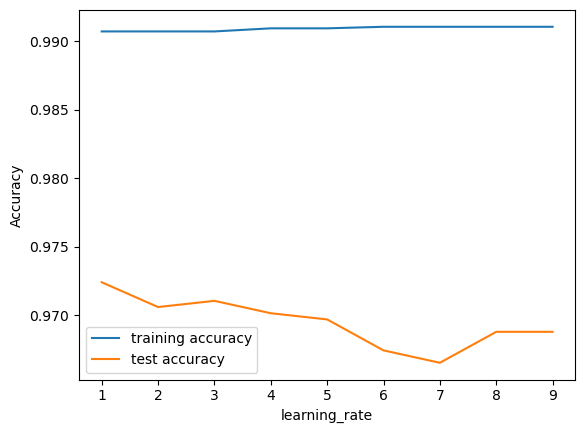

In [34]:

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [35]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

In [36]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

MLPClassifier()

In [37]:
#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [38]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 0.983
Multi-layer Perceptron : Accuracy on test Data: 0.967

Multi-layer Perceptron : f1_score on training Data: 0.985
Multi-layer Perceptron : f1_score on test Data: 0.985

Multi-layer Perceptron : Recall on training Data: 0.997
Multi-layer Perceptron : Recall on test Data: 0.989

Multi-layer Perceptron : precision on training Data: 0.973
Multi-layer Perceptron : precision on test Data: 0.953


In [39]:
print(metrics.classification_report(y_test, y_test_mlp))

              precision    recall  f1-score   support

          -1       0.99      0.94      0.96       976
           1       0.95      0.99      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.96      0.97      2211
weighted avg       0.97      0.97      0.97      2211



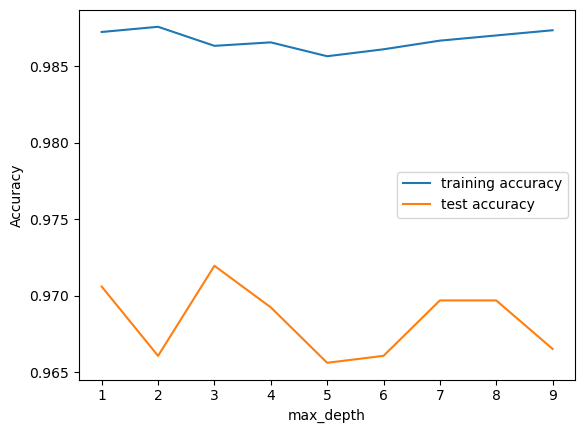

In [40]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  MLPClassifier()

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [41]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

In [42]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [43]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,K-Nearest Neighbors,0.956,0.961,0.991,0.989
1,GradientBoosting Classifier,0.974,0.977,0.994,0.986
2,CatBoost Classifier,0.969,0.972,0.993,0.991
3,Multi-layer Perceptron,0.967,0.971,0.997,0.973


In [44]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [45]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,GradientBoosting Classifier,0.974,0.977,0.994,0.986
1,CatBoost Classifier,0.969,0.972,0.993,0.991
2,Multi-layer Perceptron,0.967,0.971,0.997,0.973
3,K-Nearest Neighbors,0.956,0.961,0.991,0.989


In [46]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [47]:
import pickle

# dump information to that file
pickle.dump(gbc, open('pickle/model.pkl', 'wb'))